In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## 1) Preprocessing of the data

In [2]:
pwd

'c:\\Users\\admin\\Desktop\\Image_Classification\\model'

In [31]:
img= cv2.imread('./test_images/download.jpg')

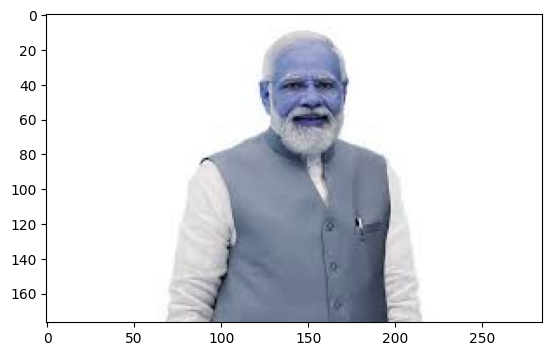

In [32]:
plt.imshow(img)

In [33]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(177, 285)

In [34]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

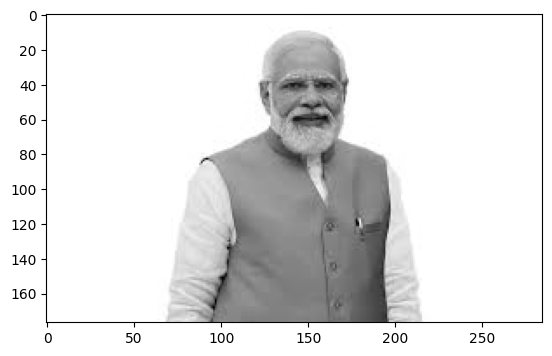

In [35]:
plt.imshow(gray, cmap= 'gray')

## Now, will apply haarcascade technique to detect 2 eyes and face

In [36]:
face_cascade= cv2.CascadeClassifier('C:/Users/admin/Desktop/Image_Classification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/admin/Desktop/Image_Classification/model/opencv/haarcascades/haarcascade_eye.xml')

In [56]:
faces= face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[126,  22,  51,  51]])

In [49]:
(x,y,w,h)= faces[0]
x,y,w,h

(126, 22, 51, 51)

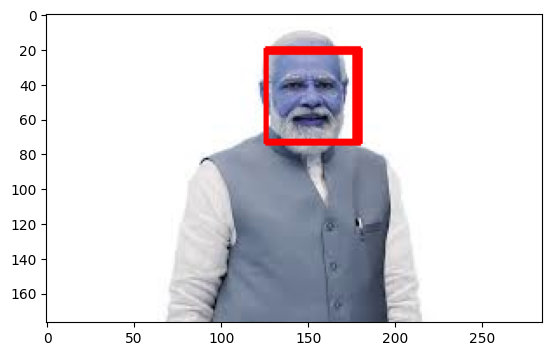

In [50]:
face_img= cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

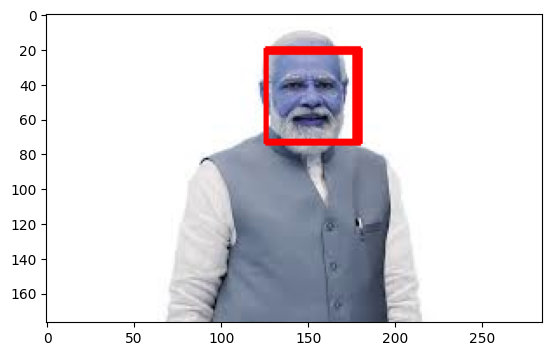

In [51]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img= cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color= face_img[y:y+h, x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(255,0,0),2)

plt.figure()
plt.imshow(face_img, cmap= 'gray')
plt.show()

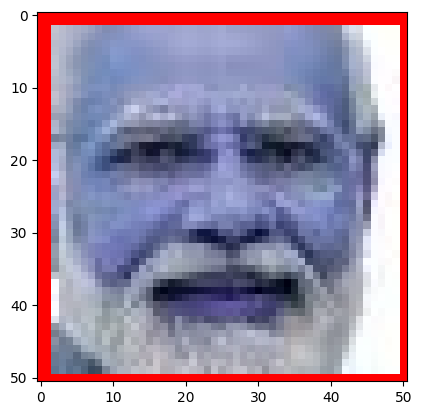

In [52]:
plt.imshow(roi_color, cmap= 'gray')

In [53]:
roi_color

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [193, 195, 206],
        ...,
        [255, 255, 248],
        [255, 255, 248],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [104, 121, 148],
        ...,
        [253, 255, 252],
        [255, 255, 252],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [ 95, 116, 144],
        ...,
        [253, 255, 254],
        [253, 255, 254],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [43]:
cropped_img= np.array(roi_color)
cropped_img.shape

(54, 54, 3)

In [54]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path,1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

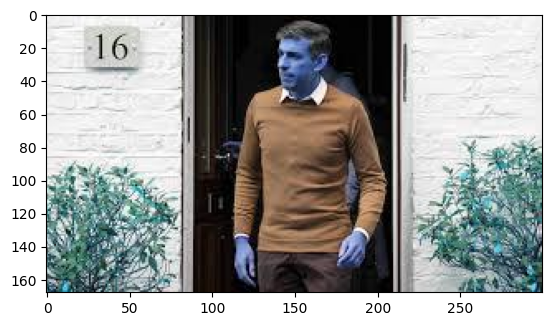

In [55]:
original_image = cv2.imread('./test_images/14.jpg')
plt.imshow(original_image)

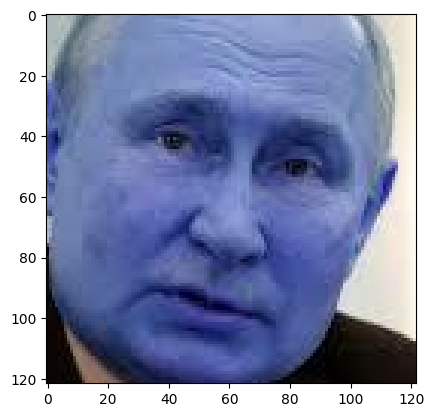

In [45]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/13.jpg')
plt.imshow(cropped_img)

In [46]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/14.jpg')
cropped_image_no_2_eyes

In [47]:
cropped_image_no_2_eyes

In [13]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/barack obama',
 './dataset/narendra modi',
 './dataset/rahul gandhi',
 './dataset/rishi sunak',
 './dataset/vladimir putin']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
leaders_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    leaders_name = img_dir.split('/')[-1]
    leaders_file_names_dict[leaders_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + leaders_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = leaders_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            leaders_file_names_dict[leaders_name].append(cropped_file_path)
            count += 1

./dataset/barack obama\0.jpg
Generating cropped images in folder:  ./dataset/cropped/barack obama
./dataset/barack obama\1.jpg
./dataset/barack obama\2.jpg
./dataset/barack obama\220313144757-barack-obama-coronavirus.jpg
./dataset/barack obama\4.jpg
./dataset/barack obama\44_barack_obama[1].jpg
./dataset/barack obama\5.jpg
./dataset/barack obama\514222_v9_bc.jpg
./dataset/barack obama\6.jpg
./dataset/barack obama\8.jpg
./dataset/barack obama\Capture1.JPG
./dataset/barack obama\Capture10.JPG
./dataset/barack obama\Capture12.JPG
./dataset/barack obama\Capture13.JPG
./dataset/barack obama\Capture2.JPG
./dataset/barack obama\Capture20.JPG
./dataset/barack obama\Capture21.JPG
./dataset/barack obama\Capture3.JPG
./dataset/barack obama\GettyImages-1437589913.jpg
./dataset/barack obama\Obama-playlist.jpg
./dataset/barack obama\_130204036_gettyimages-1258941228.jpg
./dataset/narendra modi\0.jpg
./dataset/narendra modi\1.jpg
Generating cropped images in folder:  ./dataset/cropped/narendra modi
.

In [23]:
leaders_file_names_dict

{'barack obama': ['./dataset/cropped/barack obama/barack obama1.png',
  './dataset/cropped/barack obama/barack obama2.png',
  './dataset/cropped/barack obama/barack obama3.png',
  './dataset/cropped/barack obama/barack obama4.png',
  './dataset/cropped/barack obama/barack obama5.png',
  './dataset/cropped/barack obama/barack obama6.png',
  './dataset/cropped/barack obama/barack obama7.png',
  './dataset/cropped/barack obama/barack obama8.png',
  './dataset/cropped/barack obama/barack obama9.png',
  './dataset/cropped/barack obama/barack obama10.png',
  './dataset/cropped/barack obama/barack obama11.png',
  './dataset/cropped/barack obama/barack obama12.png',
  './dataset/cropped/barack obama/barack obama13.png',
  './dataset/cropped/barack obama/barack obama14.png',
  './dataset/cropped/barack obama/barack obama15.png',
  './dataset/cropped/barack obama/barack obama16.png',
  './dataset/cropped/barack obama/barack obama17.png',
  './dataset/cropped/barack obama/barack obama18.png'],
 '

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

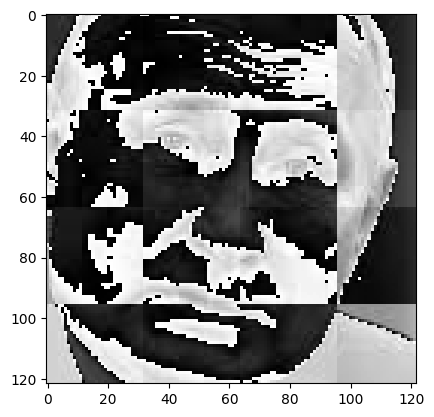

In [25]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
im_har.shape

(122, 122)

In [27]:
class_dict = {}
count = 0
for leaders_name in leaders_file_names_dict.keys():
    class_dict[leaders_name] = count
    count = count + 1
class_dict

{'barack obama': 0,
 'narendra modi': 1,
 'rahul gandhi': 2,
 'rishi sunak': 3,
 'vladimir putin': 4}

In [28]:
X, y = [], []
for leaders_name, training_files in leaders_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[leaders_name])

In [29]:
len(X[0])

4096

In [30]:
X

[array([[154],
        [151],
        [150],
        ...,
        [160],
        [  5],
        [  8]], dtype=uint8),
 array([[ 92],
        [ 96],
        [114],
        ...,
        [  1],
        [255],
        [  1]], dtype=uint8),
 array([[16],
        [ 9],
        [19],
        ...,
        [ 0],
        [64],
        [ 3]], dtype=uint8),
 array([[104],
        [ 99],
        [103],
        ...,
        [241],
        [104],
        [ 11]], dtype=uint8),
 array([[ 53],
        [ 46],
        [ 40],
        ...,
        [172],
        [122],
        [136]], dtype=uint8),
 array([[105],
        [112],
        [119],
        ...,
        [248],
        [ 13],
        [ 12]], dtype=uint8),
 array([[ 60],
        [104],
        [ 75],
        ...,
        [ 48],
        [234],
        [  1]], dtype=uint8),
 array([[93],
        [74],
        [83],
        ...,
        [ 8],
        [ 2],
        [98]], dtype=uint8),
 array([[160],
        [120],
        [101],
        ...,
        [ 

In [31]:
X[0]

array([[154],
       [151],
       [150],
       ...,
       [160],
       [  5],
       [  8]], dtype=uint8)

In [32]:
32*32*3 + 32*32

4096

In [41]:
X[0]

array([[154],
       [151],
       [150],
       ...,
       [160],
       [  5],
       [  8]], dtype=uint8)

In [42]:
X[0].shape

(4096, 1)

In [33]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(80, 4096)

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [ ]:
{'barack obama': 0,
 'narendra modi': 1,
 'rahul gandhi': 2,
 'rishi sunak': 3,
 'vladimir putin': 4}

In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       0.40      0.50      0.44         4
           3       0.67      0.50      0.57         4
           4       1.00      1.00      1.00         6

    accuracy                           0.75        20
   macro avg       0.75      0.73      0.74        20
weighted avg       0.76      0.75      0.75        20



In [63]:
## Image augmentation

In [48]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

In [145]:
input_img = plt.imread('./dataset/narendra modi/6.jpg')

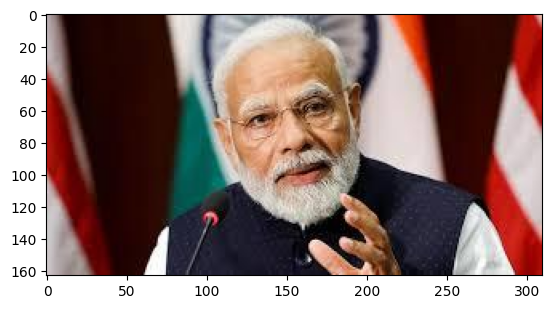

In [146]:
import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading the image
testImage = img.imread('./dataset/narendra modi/6.jpg')
  
# displaying the image
plt.imshow(testImage)

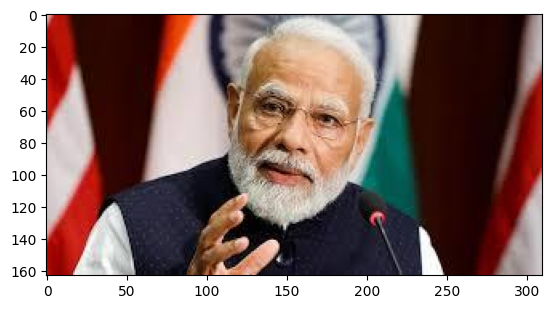

In [147]:
#Horizontal Flip
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(testImage)
plt.imshow(input_hf)
plt.imsave('./dataset/narendra modi/narendra newmodi1.png',input_hf)

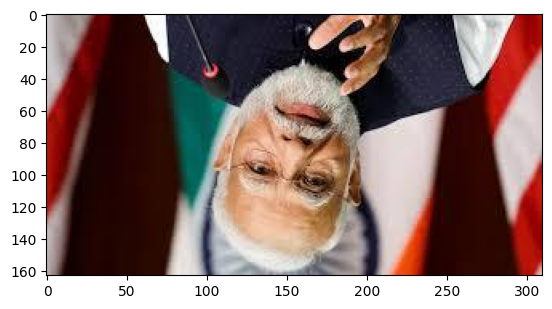

In [148]:
#Vertical Flip
vflip= iaa.Flipud(p=1.0) 
input_vf= vflip.augment_image(testImage)
plt.imshow(input_vf)
plt.imsave('./dataset/narendra modi/narendra newmodi2.png',input_vf)

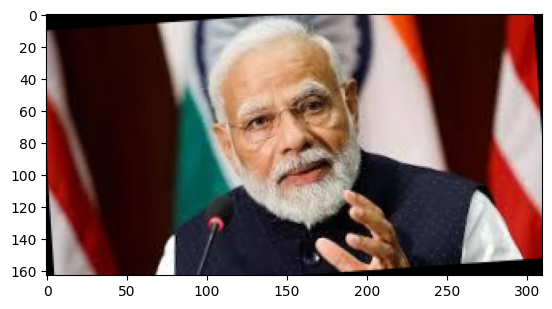

In [149]:
rot1 = iaa.Affine(rotate=(-50,20))
input_rot1 = rot1.augment_image(testImage)
plt.imshow(input_rot1)
plt.imsave('./dataset/narendra modi/narendra newmodi3.png',input_rot1)

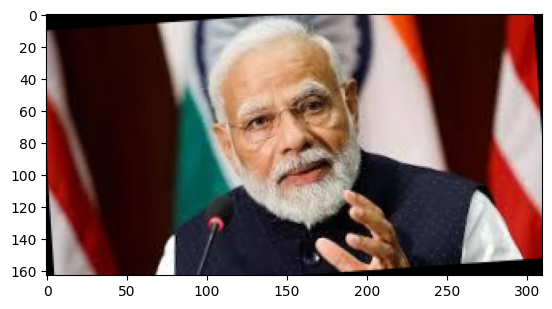

In [150]:
noise=iaa.AdditiveGaussianNoise(10,40)
input_noise=noise.augment_image(testImage)
plt.imshow(input_rot1)
plt.imsave('./dataset/narendra modi/narendra newmodi4.png',input_noise)

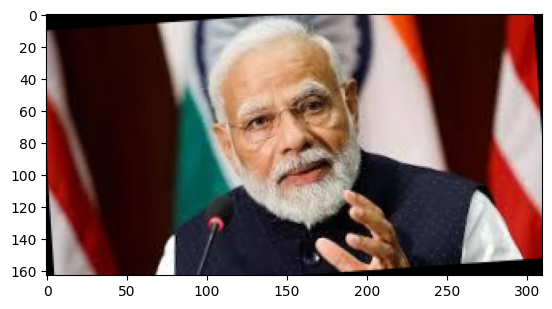

In [151]:
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(testImage)
plt.imshow(input_rot1)
plt.imsave('./dataset/narendra modi/narendra newmodi5.png',input_shear)

In [152]:
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(testImage)
plt.imsave('./dataset/narendra modi/narendra newmodi6.png',input_contrast)
sigmoid_contrast = contrast_sig.augment_image(testImage)
plt.imsave('./dataset/narendra modi/narendra newmodi7.png',sigmoid_contrast)
linear_contrast = contrast_lin.augment_image(input_img)
plt.imsave('./dataset/narendra modi/narendra newmodi8.png',linear_contrast)

In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.550000,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.733333,{'logisticregression__C': 5}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(X_test,y_test)

0.7

In [44]:

best_estimators['random_forest'].score(X_test,y_test)

0.5

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [46]:
best_clf = best_estimators['svm']

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 2, 0, 0],
       [0, 3, 0, 0, 0],
       [2, 0, 2, 0, 0],
       [0, 0, 2, 2, 0],
       [0, 0, 0, 0, 6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

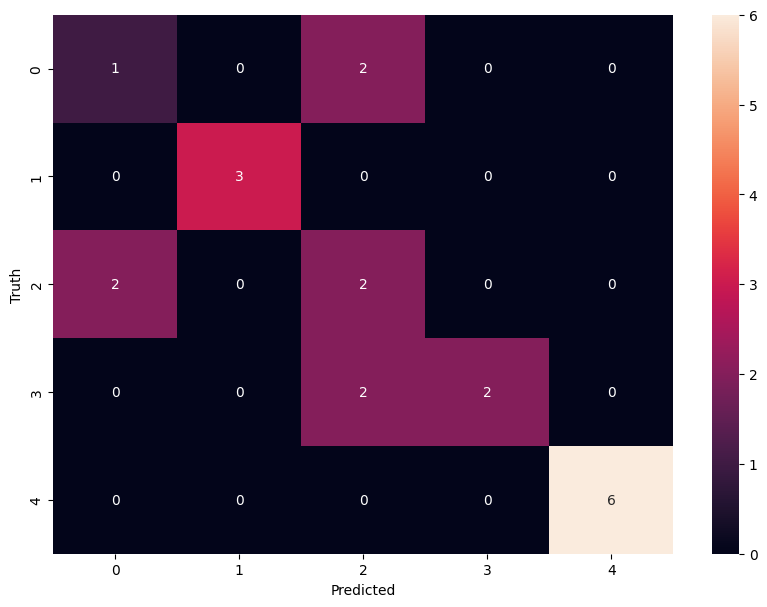

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
class_dict

{'barack obama': 0,
 'narendra modi': 1,
 'rahul gandhi': 2,
 'rishi sunak': 3,
 'vladimir putin': 4}

In [51]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))